In [0]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [35]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [38]:
train_labels = pd.read_csv('/content/train.csv')
train_labels.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [39]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (64,64))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


In [0]:
images_test=[]

for i in test_images:
  image=cv2.imread(filepath_test+i)
  image=cv2.resize(image , (64,64))
  images_test.append(image) 

In [42]:
images_test[0]

array([[[11, 11, 11],
        [11, 11, 11],
        [11, 11, 11],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[12, 12, 12],
        [12, 12, 12],
        [12, 12, 12],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       [[13, 13, 13],
        [13, 13, 13],
        [13, 13, 13],
        ...,
        [10, 10, 10],
        [10, 10, 10],
        [10, 10, 10]],

       ...,

       [[14, 14, 14],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[14, 14, 14],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9]],

       [[14, 14, 14],
        [13, 13, 13],
        [12, 12, 12],
        ...,
        [ 7,  7,  7],
        [ 9,  9,  9],
        [10, 10, 10]]], dtype=uint8)

In [43]:
images[0]

array([[[ 48,  47,  51],
        [ 47,  46,  50],
        [ 44,  43,  45],
        ...,
        [  3,  11,   4],
        [  6,  14,   7],
        [  5,  13,   6]],

       [[ 49,  48,  51],
        [ 47,  46,  49],
        [ 43,  42,  44],
        ...,
        [  8,  16,  10],
        [ 11,  18,  12],
        [ 10,  18,  12]],

       [[ 56,  55,  57],
        [ 52,  52,  54],
        [ 49,  48,  50],
        ...,
        [ 17,  24,  18],
        [ 18,  25,  20],
        [ 17,  24,  19]],

       ...,

       [[140, 152, 124],
        [131, 142, 117],
        [105, 115,  92],
        ...,
        [122, 115, 100],
        [142, 135, 120],
        [157, 150, 135]],

       [[136, 148, 120],
        [128, 139, 113],
        [102, 112,  90],
        ...,
        [126, 118, 103],
        [145, 138, 124],
        [160, 153, 138]],

       [[137, 149, 121],
        [129, 139, 114],
        [102, 111,  89],
        ...,
        [123, 117, 101],
        [144, 137, 122],
        [158, 151, 136]]

In [44]:
images

[array([[[ 48,  47,  51],
         [ 47,  46,  50],
         [ 44,  43,  45],
         ...,
         [  3,  11,   4],
         [  6,  14,   7],
         [  5,  13,   6]],
 
        [[ 49,  48,  51],
         [ 47,  46,  49],
         [ 43,  42,  44],
         ...,
         [  8,  16,  10],
         [ 11,  18,  12],
         [ 10,  18,  12]],
 
        [[ 56,  55,  57],
         [ 52,  52,  54],
         [ 49,  48,  50],
         ...,
         [ 17,  24,  18],
         [ 18,  25,  20],
         [ 17,  24,  19]],
 
        ...,
 
        [[140, 152, 124],
         [131, 142, 117],
         [105, 115,  92],
         ...,
         [122, 115, 100],
         [142, 135, 120],
         [157, 150, 135]],
 
        [[136, 148, 120],
         [128, 139, 113],
         [102, 112,  90],
         ...,
         [126, 118, 103],
         [145, 138, 124],
         [160, 153, 138]],
 
        [[137, 149, 121],
         [129, 139, 114],
         [102, 111,  89],
         ...,
         [123, 117, 101],
  

In [45]:
print(type(images))
print(type(images_test))

<class 'list'>
<class 'list'>


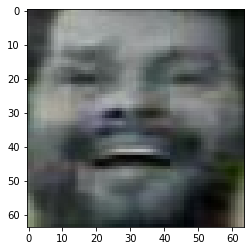

In [46]:
plt.imshow(images[0])

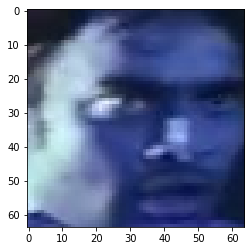

In [47]:
plt.imshow(images[1])

In [48]:
df_train.tail()

,ID,Class
19901,2482.jpg,MIDDLE
19902,20085.jpg,YOUNG
19903,19663.jpg,MIDDLE
19904,10132.jpg,MIDDLE
19905,9896.jpg,MIDDLE


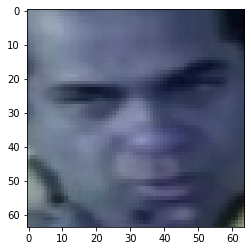

In [49]:
plt.imshow(images[-1])

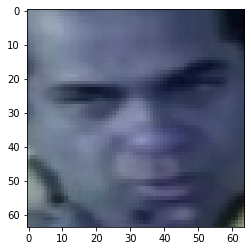

In [50]:
plt.imshow(images[19905])

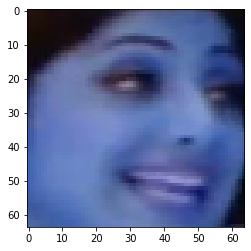

In [51]:
plt.imshow(images[19904])

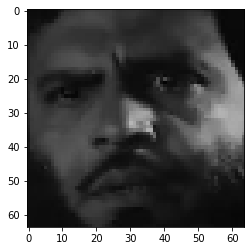

In [52]:
plt.imshow(images_test[0])

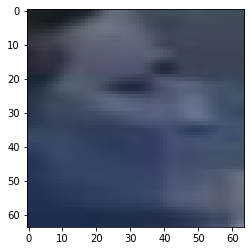

In [53]:
plt.imshow(images_test[-1])

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

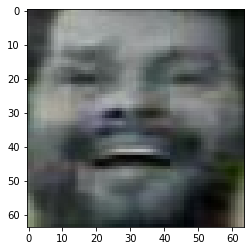

In [55]:
plt.imshow(images[0])

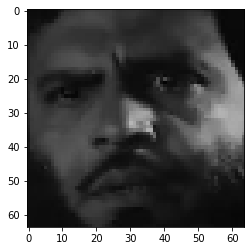

In [56]:
plt.imshow(images_test[0])

In [57]:
images[0]

array([[[0.18823529, 0.18431373, 0.2       ],
        [0.18431373, 0.18039216, 0.19607843],
        [0.17254902, 0.16862745, 0.17647059],
        ...,
        [0.01176471, 0.04313725, 0.01568627],
        [0.02352941, 0.05490196, 0.02745098],
        [0.01960784, 0.05098039, 0.02352941]],

       [[0.19215686, 0.18823529, 0.2       ],
        [0.18431373, 0.18039216, 0.19215686],
        [0.16862745, 0.16470588, 0.17254902],
        ...,
        [0.03137255, 0.0627451 , 0.03921569],
        [0.04313725, 0.07058824, 0.04705882],
        [0.03921569, 0.07058824, 0.04705882]],

       [[0.21960784, 0.21568627, 0.22352941],
        [0.20392157, 0.20392157, 0.21176471],
        [0.19215686, 0.18823529, 0.19607843],
        ...,
        [0.06666667, 0.09411765, 0.07058824],
        [0.07058824, 0.09803922, 0.07843137],
        [0.06666667, 0.09411765, 0.0745098 ]],

       ...,

       [[0.54901961, 0.59607843, 0.48627451],
        [0.51372549, 0.55686275, 0.45882353],
        [0.41176471, 0

In [58]:
images_test[0]

array([[[0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        [0.04705882, 0.04705882, 0.04705882],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        [0.05098039, 0.05098039, 0.05098039],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       ...,

       [[0.05490196, 0.05490196, 0.05490196],
        [0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=6)

In [60]:
print(type(trainX))
print(trainX.shape)
print(type(trainY))
print(trainY.shape)
print(type(testX))
print(testX.shape)
print(type(testY))
print(testY.shape)

<class 'numpy.ndarray'>
(13934, 64, 64, 3)
<class 'numpy.ndarray'>
(13934,)
<class 'numpy.ndarray'>
(5972, 64, 64, 3)
<class 'numpy.ndarray'>
(5972,)


In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [62]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = "same", activation ='relu', input_shape = (64,64,3)))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same",activation="relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(3,activation="softmax"))


In [0]:
INIT_LR = 0.01 
EPOCHS = 20 #30
BS = 32

opt=SGD(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [66]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/20
435/435 [==============================] - 31s 70ms/step - loss: 1.1806 - accuracy: 0.5047 - val_loss: 1.0963 - val_accuracy: 0.4298
Epoch 2/20
435/435 [==============================] - 21s 49ms/step - loss: 0.8847 - accuracy: 0.5978 - val_loss: 0.7863 - val_accuracy: 0.6393
Epoch 3/20
435/435 [==============================] - 22s 50ms/step - loss: 0.8454 - accuracy: 0.6171 - val_loss: 0.7778 - val_accuracy: 0.6552
Epoch 4/20
435/435 [==============================] - 21s 49ms/step - loss: 0.8213 - accuracy: 0.6299 - val_loss: 0.7475 - val_accuracy: 0.6680
Epoch 5/20
435/435 [==============================] - 22s 49ms/step - loss: 0.8079 - accuracy: 0.6342 - val_loss: 0.7444 - val_accuracy: 0.6587
Epoch 6/20
435/435 [==============================] - 21s 49ms/step - loss: 0.7997 - accuracy: 0.6427 - val_loss: 0.7699 - val_accuracy: 0.6562
Epoch 7/20
435/435 [==============================] - 22s 50ms/step - loss: 0.7852 - accuracy: 0.6466 - val_loss: 0.7032 - val_accuracy:

In [67]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.74      0.87      0.80      3183
         OLD       0.57      0.45      0.50       692
       YOUNG       0.83      0.67      0.74      2097

    accuracy                           0.75      5972
   macro avg       0.71      0.66      0.68      5972
weighted avg       0.75      0.75      0.74      5972



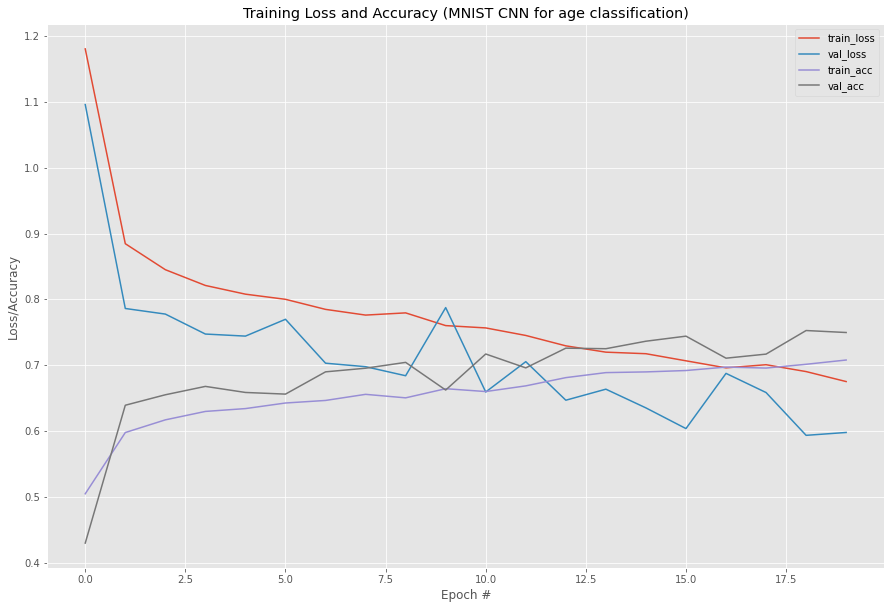

In [68]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()